# Trend Analysis & Modelling notebook

## Table of Contents:

* Spatiotemporal Trends in Farmer Age

* Regional Variations and Economic Impact

* Inflation Adjustment and Sales Analysis

For reference, Here is a mapping of the FIPS code with the state name.

* 01: Alabama
* 02: Alaska
* 04: Arizona
* 05: Arkansas
* 06: California
* 08: Colorado
* 09: Connecticut
* 10: Delaware
* 11: District of Columbia
* 12: Florida
* 13: Georgia
* 15: Hawail
* 16: Idaho
* 17: Illinois
* 18: Indiana
* 19: lowa
* 20: Kansas
* 21: Kentucky
* 22: Louisiana
* 23: Maine
* 24: Maryland
* 25: Massachusetts
* 26: Michigan
* 27: Minnesota
* 28: Mississippi
* 29: Missouri
* 30: Montana
* 31: Nebraska
* 32: Nevada
* 33: New Hampshire
* 34: New Jersey
* 35: New Mexico
* 36: New York
* 37: North Carolina
* 38: North Dakota
* 39: Ohio
* 40: Oklahoma
* 41: Oregon
* 42: Pennsylvania
* 44: Rhode Island
* 45: South Carolina
* 46: South Dakota
* 47: Tennessee
* 48: Texas
* 49: Utah
* 50: Vermont
* 51: Virginia
* 53: Washington
* 54: West Virginia
* 55: Wisconsin
56: Wyoming

Importing the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the dataset
file_path = '/content/Final_Cleaned_data.csv'
data = pd.read_csv(file_path)

import warnings
warnings.filterwarnings('ignore')


## Spatiotemporal Trends in Farmer Age

Question 1) How has the average age of farmers evolved over time across states, and nation in the United States, from 1997 onwards?

### Preprocessing steps :
* Select relevant columns: Isolate the necessary data.
* Remove missing values: Ensures that only complete data is analyzed.
* Convert data types: Makes sure each column is in the appropriate format for further analysis or computation

In [ ]:
# Select relevant columns
relevant_columns = ['YEAR', 'STATE_FIPS_CODE', 'OPERATORS_PRINCIPAL_AGE_AVG_MEASURED_IN_YEARS']
age_data = data[relevant_columns]

# Drop rows with missing values in the average age column
age_data_cleaned = age_data.dropna(subset=['OPERATORS_PRINCIPAL_AGE_AVG_MEASURED_IN_YEARS'])

# Convert to appropriate types
age_data_cleaned['YEAR'] = age_data_cleaned['YEAR'].astype(int)
age_data_cleaned['STATE_FIPS_CODE'] = age_data_cleaned['STATE_FIPS_CODE'].astype(str)
age_data_cleaned['OPERATORS_PRINCIPAL_AGE_AVG_MEASURED_IN_YEARS'] = age_data_cleaned['OPERATORS_PRINCIPAL_AGE_AVG_MEASURED_IN_YEARS'].astype(float)


### Correlation Analysis using a Heatmap

Heatmap of Farmer's Age by State will show a color gradient to represent the average age in each state across different years.

* The heatmap shows the average age of farmers across various U.S. states (represented by their FIPS codes) over the years 1997 to 2022.
* Darker shades indicate lower average ages, while lighter shades represent higher average ages of farmers in each state, providing a visual trend of aging across time and geographic locations.

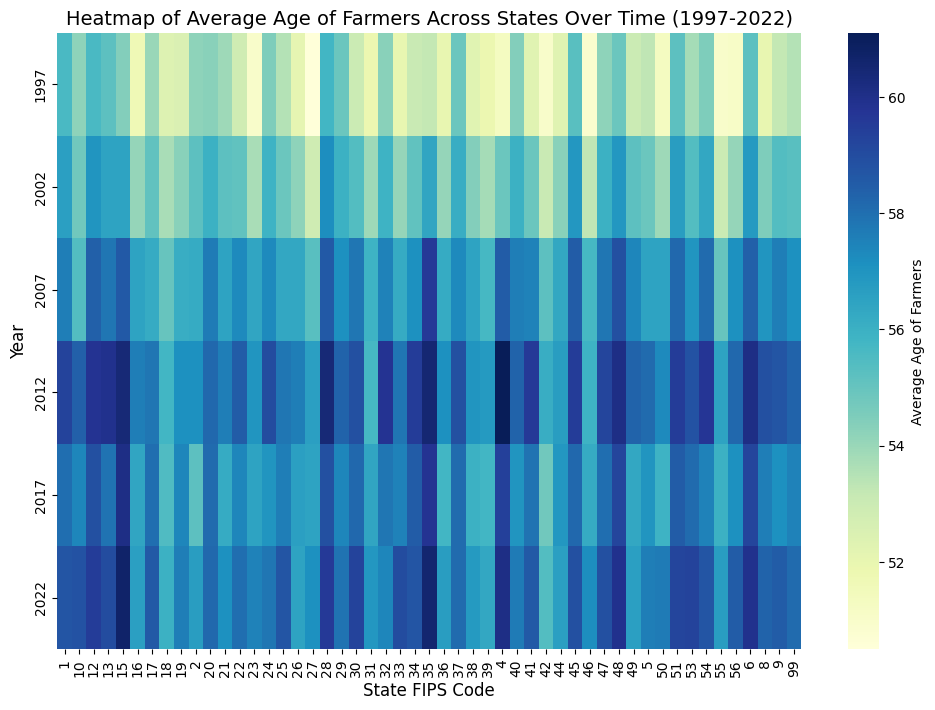

In [ ]:
# Pivot the data to have years as rows and states as columns
heatmap_data = age_data_cleaned.pivot_table(index='YEAR', columns='STATE_FIPS_CODE', values='OPERATORS_PRINCIPAL_AGE_AVG_MEASURED_IN_YEARS')

# Plot a heatmap for average age of farmers across states over time
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=False, cbar_kws={'label': 'Average Age of Farmers'})

# Add title and labels
plt.title('Heatmap of Average Age of Farmers Across States Over Time (1997-2022)', fontsize=14)
plt.xlabel('State FIPS Code', fontsize=12)
plt.ylabel('Year', fontsize=12)

# Display the heatmap
plt.show()


In [ ]:
# First, we'll map the state FIPS codes to their corresponding state abbreviations.
# Using a predefined dictionary to map FIPS codes to state abbreviations.

fips_to_state = {
    '01': 'AL', '02': 'AK', '04': 'AZ', '05': 'AR', '06': 'CA', '08': 'CO', '09': 'CT', '10': 'DE', '11': 'DC',
    '12': 'FL', '13': 'GA', '15': 'HI', '16': 'ID', '17': 'IL', '18': 'IN', '19': 'IA', '20': 'KS', '21': 'KY',
    '22': 'LA', '23': 'ME', '24': 'MD', '25': 'MA', '26': 'MI', '27': 'MN', '28': 'MS', '29': 'MO', '30': 'MT',
    '31': 'NE', '32': 'NV', '33': 'NH', '34': 'NJ', '35': 'NM', '36': 'NY', '37': 'NC', '38': 'ND', '39': 'OH',
    '40': 'OK', '41': 'OR', '42': 'PA', '44': 'RI', '45': 'SC', '46': 'SD', '47': 'TN', '48': 'TX', '49': 'UT',
    '50': 'VT', '51': 'VA', '53': 'WA', '54': 'WV', '55': 'WI', '56': 'WY'
}

# Add the state abbreviation to the dataset
age_data_cleaned['STATE_ABBR'] = age_data_cleaned['STATE_FIPS_CODE'].map(fips_to_state)

# Filter the data for the years 2002 and 2022
data_2002 = age_data_cleaned[age_data_cleaned['YEAR'] == 2002]
data_2022 = age_data_cleaned[age_data_cleaned['YEAR'] == 2022]

# Find the state with the highest and lowest average age in 2002 and 2022
highest_2002 = data_2002.loc[data_2002['OPERATORS_PRINCIPAL_AGE_AVG_MEASURED_IN_YEARS'].idxmax()]
lowest_2002 = data_2002.loc[data_2002['OPERATORS_PRINCIPAL_AGE_AVG_MEASURED_IN_YEARS'].idxmin()]

highest_2022 = data_2022.loc[data_2022['OPERATORS_PRINCIPAL_AGE_AVG_MEASURED_IN_YEARS'].idxmax()]
lowest_2022 = data_2022.loc[data_2022['OPERATORS_PRINCIPAL_AGE_AVG_MEASURED_IN_YEARS'].idxmin()]

highest_2002_state = highest_2002['STATE_ABBR']
lowest_2002_state = lowest_2002['STATE_ABBR']
highest_2022_state = highest_2022['STATE_ABBR']
lowest_2022_state = lowest_2022['STATE_ABBR']

highest_2002_age = highest_2002['OPERATORS_PRINCIPAL_AGE_AVG_MEASURED_IN_YEARS']
lowest_2002_age = lowest_2002['OPERATORS_PRINCIPAL_AGE_AVG_MEASURED_IN_YEARS']
highest_2022_age = highest_2022['OPERATORS_PRINCIPAL_AGE_AVG_MEASURED_IN_YEARS']
lowest_2022_age = lowest_2022['OPERATORS_PRINCIPAL_AGE_AVG_MEASURED_IN_YEARS']

highest_2002_state, highest_2002_age, lowest_2002_state, lowest_2002_age, highest_2022_state, highest_2022_age, lowest_2022_state, lowest_2022_age


('MS', 57.2, 'MN', 52.9, 'HI', 60.7, 'PA', 55.4)

* Farmers in **Mississippi** had an average age of **57.2** in the year **2002**, which was the **highest** compared to other states for that year.

* Farmers in **Minnesota** had an average age of **52.9** in the year **2002**, which was the **lowest** compared to other states for that year.

* Farmers in **Hawaii** had an average age of **60.7**, in the year **2022**, which was the **highest** compared to other states for that year.

* Farmers in **Pennsylvania** had an average age of **55.8** in the year **2022**, which was the **lowest** compared to other states for that year.

In [ ]:
# National average for each year
national_avg = age_data_cleaned.groupby('YEAR')['OPERATORS_PRINCIPAL_AGE_AVG_MEASURED_IN_YEARS'].mean().reset_index()
national_avg['STATE_FIPS_CODE'] = 'National'

# Combine national average with state-level data for plotting
comparison_data = pd.concat([age_data_cleaned, national_avg])

# Create an interactive line plot
fig = px.line(comparison_data,
              x='YEAR',
              y='OPERATORS_PRINCIPAL_AGE_AVG_MEASURED_IN_YEARS',
              color='STATE_FIPS_CODE',
              title='Average Age of Farmers Across States and National Average (1997-2022)',
              labels={'OPERATORS_PRINCIPAL_AGE_AVG_MEASURED_IN_YEARS': 'Average Age of Farmers (Years)', 'YEAR': 'Year'},
              hover_name='STATE_FIPS_CODE')

# Show the interactive plot
fig.show()




**Hover over the graph to view the state code, year, and the corresponding average age of farmers.
You can also click on the FIPS codes in the legend to show or hide specific lines for better clarity and comparison. Additionally, you can scroll through the list of FIPS codes to explore more states.**

### The national average for each year based on the data is an upward trend (Red Line)

 * 2000: 54.5 Years
 * 2005 : 56.5 Years
 * 2007 : 57.2 Years
 * 2010 : 57.9 Years
 * 2012 : 58.4 Years
 * 2017 : 57.37 Years
 * 2022 : 58.09 Years


Across most states, there is a clear upward trend in the average age of
farmers.

### Regional Variations

1. States that have a significant percentage of younger farmers.
  * **Rhode Island (FIPS 44)**
  * **Alaska (FIPS 2)**
  * **Maine (FIPS 23)**

2. On the other hand, states that have been consistent in having a higher-than-average farmer age througout the years
  * **Mississippi (FIPS code 28)**
  * **Florida: (FIPS 12)**
  * **California (FIPS 06)**


3. **Arizona (FIPS 4)** seems to have one of the the highest average farmers age 60.1 in 2022
4. D**elaware (FIPS 10)** also seems to have a significant increase in farmers through the years

### 2012 as a Notable Peak

1. Many states show the darkest shades in 2012, suggesting that the average age peaked around this time. However, in the subsequent years, there’s a slight drop or stabilization in the average age,

## Aging Trend in Larger Farms

1. From our analysis, it can be found that Larger farms,  tend to be operated by older farmers who have accumulated resources and experience over time.

2. **Texas (FIPS 48)**  which is the state with is the state with the largest farmland in the United States, reflects the increasing trend of an aging agricultural population​.

3. Montana (FIPS 30) is another state that depicts an aging trend among farmers and has a large area of farmland

### Hypothesis from analysis :

Generally, regions in the southern and southwestern United States tend to have larger farmlands and an older farming population compared to the northeastern states, where farms are typically smaller and include a more significant proportion of younger farmers. Across all states, the average age of farmers has steadily increased over the years, largely due to younger generations entering the farming profession at much lower rates than older farmers are retiring.

By forecasting and analyzing this data, we can further explore the hypothesis that larger farms are more commonly operated by older farmers. Technological advancements are playing an essential role in helping older farmers maintain productivity with reduced physical strain. This trend is particularly evident in states like Texas and California, where higher-tech farming methods may enable an older farming population to continue working effectively without excessive effort.



## Regional Variations and Economic Impact

In [ ]:
cleaned_df = data

# Handling missing values
cleaned_df['OPERATORS_PRINCIPAL_AGE_AVG_MEASURED_IN_YEARS'].fillna(
    cleaned_df['OPERATORS_PRINCIPAL_AGE_AVG_MEASURED_IN_YEARS'].mean(), inplace=True)
cleaned_df.fillna(0, inplace=True)

# Feature Engineering to generate columns required for forecasting
cleaned_df['TOTAL_SALES'] = cleaned_df.filter(like='SALES_MEASURED_IN_DOLLARS').sum(axis=1)
cleaned_df['AVG_HARVESTED_ACRES'] = cleaned_df['AG_LAND_CROPLAND_HARVESTED_ACRES'] / cleaned_df['YEAR'].nunique()

# Grouping data by state and year to forecast average farmer age for each state
states = cleaned_df['STATE_FIPS_CODE'].unique()

state_forecasts = {}
forecast_periods = 6

for state in states:
    state_data = cleaned_df[cleaned_df['STATE_FIPS_CODE'] == state]

    # Preparing the time series data for SARIMA
    state_ts = state_data.set_index('YEAR')['OPERATORS_PRINCIPAL_AGE_AVG_MEASURED_IN_YEARS']

    if len(state_ts) > 5:
        # Fitting SARIMA model (p,d,q) and (P,D,Q,s) for seasonality
        sarima_model = SARIMAX(state_ts, order=(1, 1, 1), seasonal_order=(1, 1, 1, 3), enforce_stationarity=False, enforce_invertibility=False)
        sarima_fit = sarima_model.fit(disp=False)

        # Forecasting for the next 6 years (2023 to 2028)
        forecast = sarima_fit.get_forecast(steps=forecast_periods)
        forecast_values = forecast.predicted_mean

        state_forecasts[state] = forecast_values

In [ ]:
fig = go.Figure()

for state in states:
    state_data = cleaned_df[cleaned_df['STATE_FIPS_CODE'] == state]
    if state in state_forecasts:
        forecast = state_forecasts[state]

        # Plot the actual data points
        fig.add_trace(go.Scatter(
            x=state_data['YEAR'], y=state_data['OPERATORS_PRINCIPAL_AGE_AVG_MEASURED_IN_YEARS'], mode='markers+lines', name=f'{state} Actual', marker=dict(size=8),
            line=dict(width=2), legendgroup=str(state), showlegend=True))

        last_year = state_data['YEAR'].max()
        forecast_years = np.arange(last_year + 1, last_year + 1 + forecast_periods)

        # Plot the forecast values
        fig.add_trace(go.Scatter( x=forecast_years, y=forecast, mode='lines', name=f'{state} Forecast (2023-2028)', line=dict(dash='dash', color='gray'),
                                 legendgroup=str(state),showlegend=True))

        # Marking 2025 and 2028 forecast values
        fig.add_trace(go.Scatter( x=[forecast_years[2]], y=[forecast.iloc[2]], mode='markers', name=f'{state} 2025 Forecast', marker=dict(color='red', size=10),
                                 legendgroup=str(state), showlegend=True))

        fig.add_trace(go.Scatter(x=[forecast_years[5]], y=[forecast.iloc[5]], mode='markers', name=f'{state} 2028 Forecast', marker=dict(color='green', size=10),
            legendgroup=str(state), showlegend=True))

fig.update_layout(
    title='Average Age of Farmers (Actual and SARIMA Forecast) by State',
    xaxis_title='Year',
    yaxis_title='Average Age of Farmers',
    legend_title="States"
)

fig.show()


The key insights we can draw from the forecast modelling are,

### Correlation Between Average Age of Farmers and Economic Scale of Farms

* **Larger Farms, Older Operators:** Larger farms are more likely to have older operators because older farmers tend to have accumulated more capital and land over their careers. This often results in older farmers running larger, more economically significant farms.

* **Younger Farmers and Smaller Farms:** Younger farmers are more likely to operate smaller farms or be involved in alternative or niche farming enterprises, as they may lack the resources to manage large-scale operations from the start.

### Trends in the Average Age of Farmers Over the Years

* Steady Increase: The average age of farmers has been increasing steadily over the last few decades, as seen in the provided plot. This trend is largely due to younger generations not entering farming at the same rate as older farmers retire or reduce their activity.

* Delayed Retirement: Many older farmers delay retirement, either due to financial necessity or emotional ties to the land. Additionally, advancements in technology allow them to continue managing their farms despite the physical demands of the profession.

## Inflation Adjustment and Sales Analysis

Question 2) Does adjusting for inflation reveal different trends in the relationship between
farmer age and farm production?

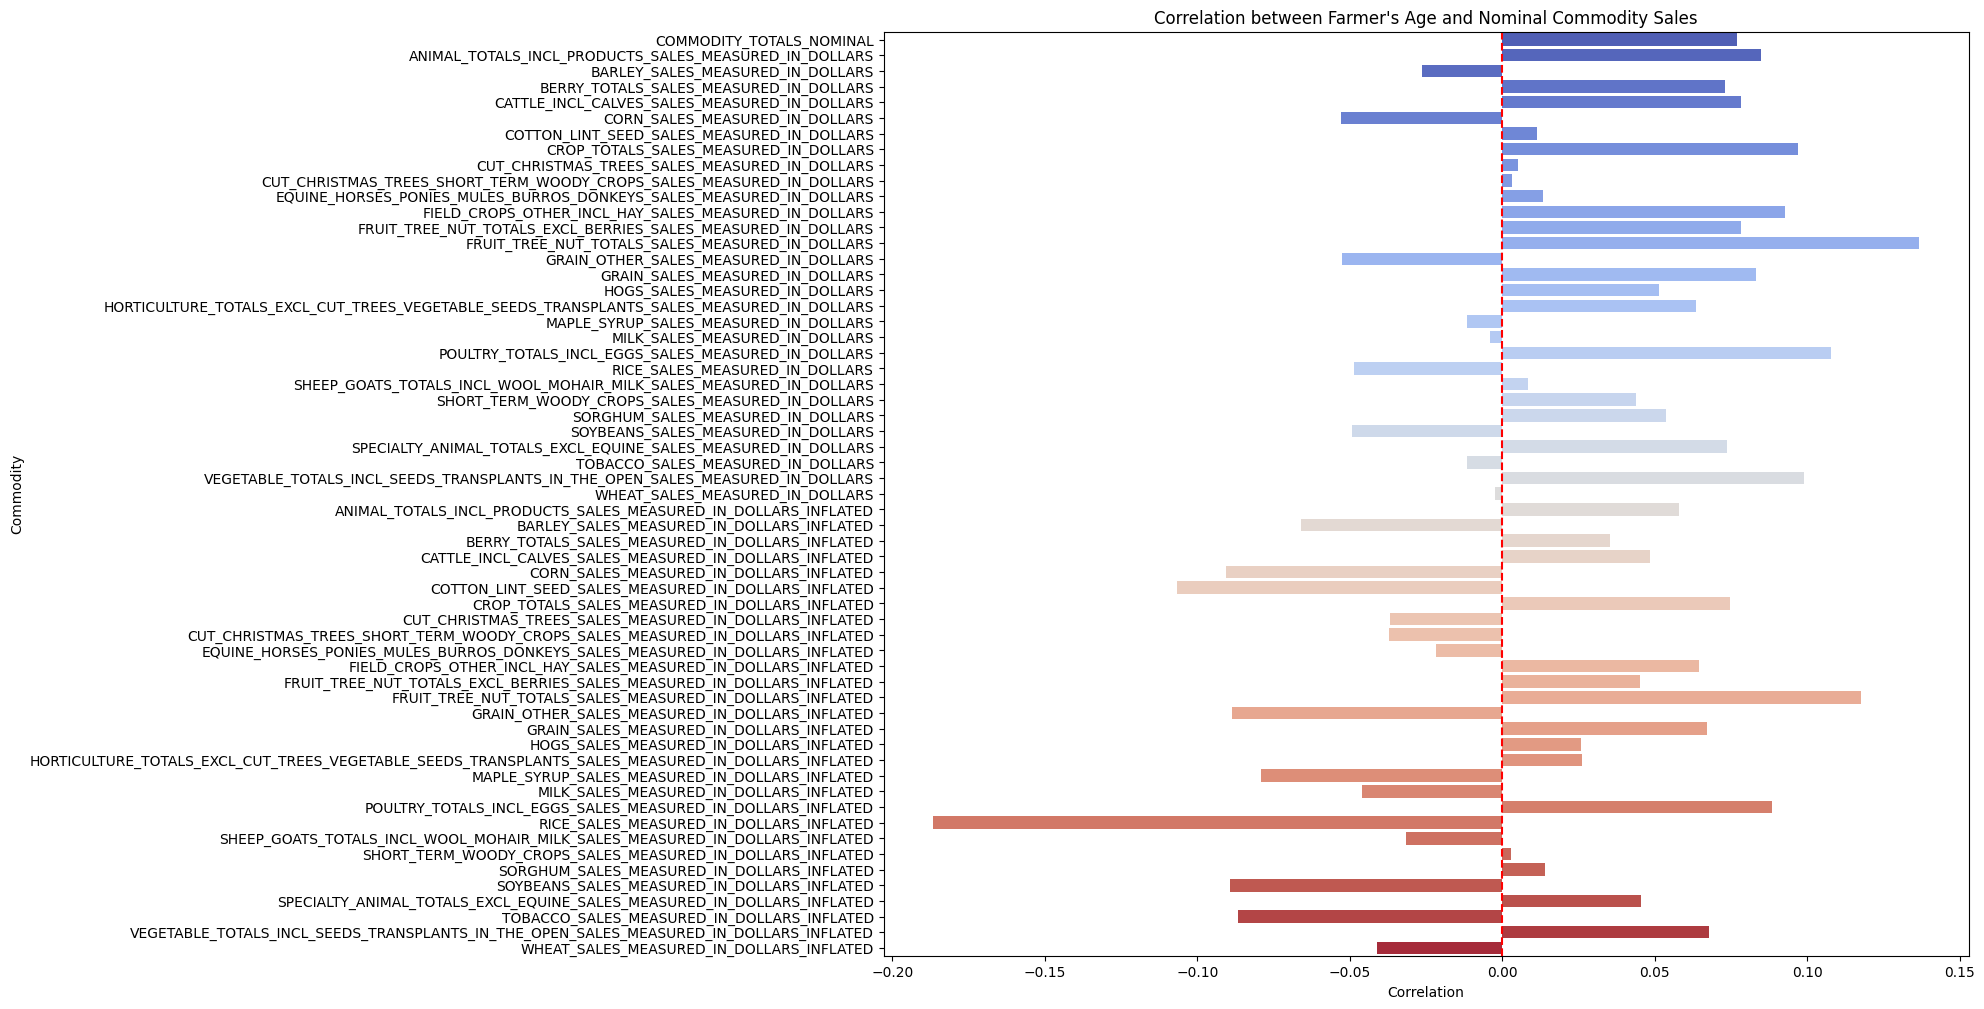

In [ ]:
df = data

# Combine all 'commodity' columns into one for nominal sales
df['COMMODITY_TOTALS_NOMINAL'] = df.filter(like='COMMODITY').sum(axis=1)

# Select relevant columns for correlation
age_column = 'OPERATORS_PRINCIPAL_AGE_AVG_MEASURED_IN_YEARS'
nominal_sales_columns = ['COMMODITY_TOTALS_NOMINAL'] + [col for col in df.columns if 'SALES_MEASURED_IN_DOLLARS' in col and not col.startswith('COMMODITY')]

# Calculate correlations
correlations_nominal = df[[age_column] + nominal_sales_columns].corr()[age_column].drop(age_column)

# Plotting
plt.figure(figsize=(14, 12))
sns.barplot(y=correlations_nominal.index, x=correlations_nominal.values, palette='coolwarm', orient='h')
plt.axvline(0, color='red', linestyle='--')
plt.title("Correlation between Farmer's Age and Nominal Commodity Sales")
plt.xlabel('Correlation')
plt.ylabel('Commodity')
plt.show()

* Are there specific crop types where the correlation between farmer age and production is more pronounced after adjusting for inflation?

In [ ]:
# Are there specific crop types where the correlation between farmer age and production is more pronounced after adjusting for inflation?

df = data

# List of columns with inflation-adjusted sales
inflated_columns = [col for col in data.columns if 'SALES_MEASURED_IN_DOLLARS_INFLATED' in col]

# Calculate correlations with farmer age
correlations = {}
for col in inflated_columns:
    correlation = data[col].corr(data['OPERATORS_PRINCIPAL_AGE_AVG_MEASURED_IN_YEARS'])
    correlations[col] = correlation

# Sort by absolute value of correlation and select top 5
top_5_crops = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)[:5]

# Create a DataFrame for better visualization
top_5_df = pd.DataFrame(top_5_crops, columns=['Crop Type', 'Correlation'])

top_5_df

,Crop Type,Correlation
0,RICE_SALES_MEASURED_IN_DOLLARS_INFLATED,-0.186695
1,FRUIT_TREE_NUT_TOTALS_SALES_MEASURED_IN_DOLLAR...,0.117660
2,COTTON_LINT_SEED_SALES_MEASURED_IN_DOLLARS_INF...,-0.106521
3,CORN_SALES_MEASURED_IN_DOLLARS_INFLATED,-0.090669
4,SOYBEANS_SALES_MEASURED_IN_DOLLARS_INFLATED,-0.089357


The above question can be answered by calculating the correlation between farmer's age and crop types sales in dollars both before and after inflation adjustment.

### Nominal vs. Inflation-Adjusted Correlations:

The plot shows both nominal and inflation-adjusted correlations between farmer age and various commodity sales.

* Nominal sales correlations are shown in blue, while inflation-adjusted correlations are in red.
Pronounced Correlations:
* Some commodities exhibit a more pronounced correlation with farmer age after adjusting for inflation. These are represented by longer bars in the red section of the plot.


The key insights we can draw from the plot are,

### Negative Correlations:

* Several commodities, such as rice, corn, cotton show negative correlations with farmer age after inflation adjustment, indicating that as farmers age, production or sales decrease for these commodities.

### Impact of Inflation Adjustment:

* Adjusting for inflation tends to reveal stronger negative correlations for certain commodities, suggesting that older farmers might be less involved in high-production activities or that their operations may not scale as effectively with age.

This analysis helps identify which commodities are most sensitive to changes in farmer demographics when considering real economic values.